In [ ]:
pip install pmdarima

# Instalando e importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install pmdarima
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima, arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from prophet import Prophet

In [ ]:
!pip install openpyxl
import pandas as pd

df = pd.read_excel('/content/Dados  petroleo Forecasting (1).xlsx', engine='openpyxl') # Use pd.read_excel with engine='openpyxl'
print(df.head())

   Unnamed: 0       data  Fechamento realizado  preco_previsto  preco
0           0 2024-09-23                 74.95       90.658473     91
1           1 2024-09-20                 75.96       90.578831     91
2           2 2024-09-19                 75.93       90.565526     91
3           3 2024-09-18                 74.52       90.463839     90
4           4 2024-09-17                 74.55       90.515278     91


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'data', 'Fechamento realizado', 'preco_previsto',
       'preco'],
      dtype='object')


In [ ]:
df.rename(columns={'Preco - petroleo bruto - Brent (FOB)': 'preco'}, inplace=True)

In [ ]:
df['preco'] = df['preco'].astype(str).str.replace(',', '.').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            11262 non-null  int64         
 1   data                  11262 non-null  datetime64[ns]
 2   Fechamento realizado  11262 non-null  float64       
 3   preco_previsto        11262 non-null  float64       
 4   preco                 11262 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 440.0 KB


# Tratamento dos dados

In [ ]:
df.rename(columns={'Data -': 'data', 'Preco - petroleo bruto - Brent (FOB)': 'preco'}, inplace=True)

# Visualização dos Dados

Variação do Preço do Petróleo Brent

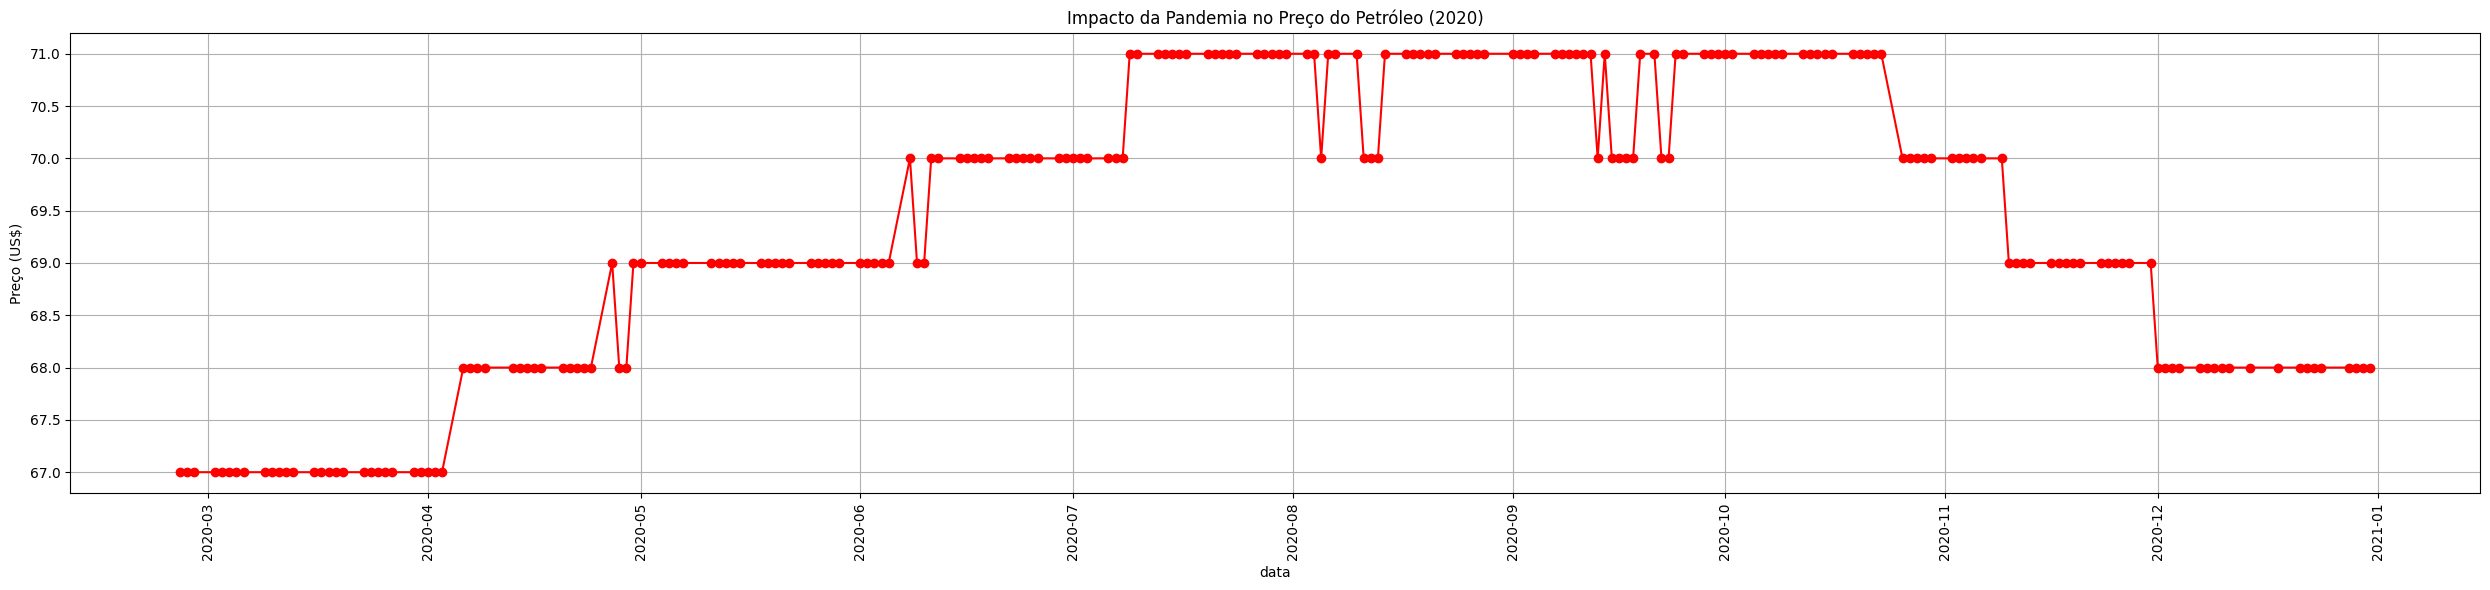

In [ ]:
import matplotlib.pyplot as plt

df_covid = df[(df['data'] >= '2020-02-26') & (df['data'] <= '2020-12-31')]
# Assigning the figure to the variable fig
plt.figure(figsize=(25, 6))
plt.plot(df_covid['data'], df_covid['preco'], marker='o', color='red', linestyle='-')
plt.title('Impacto da Pandemia no Preço do Petróleo (2020)')
plt.xlabel('data')
plt.ylabel('Preço (US$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Tensões Geopolíticas no Oriente Médio (2020)

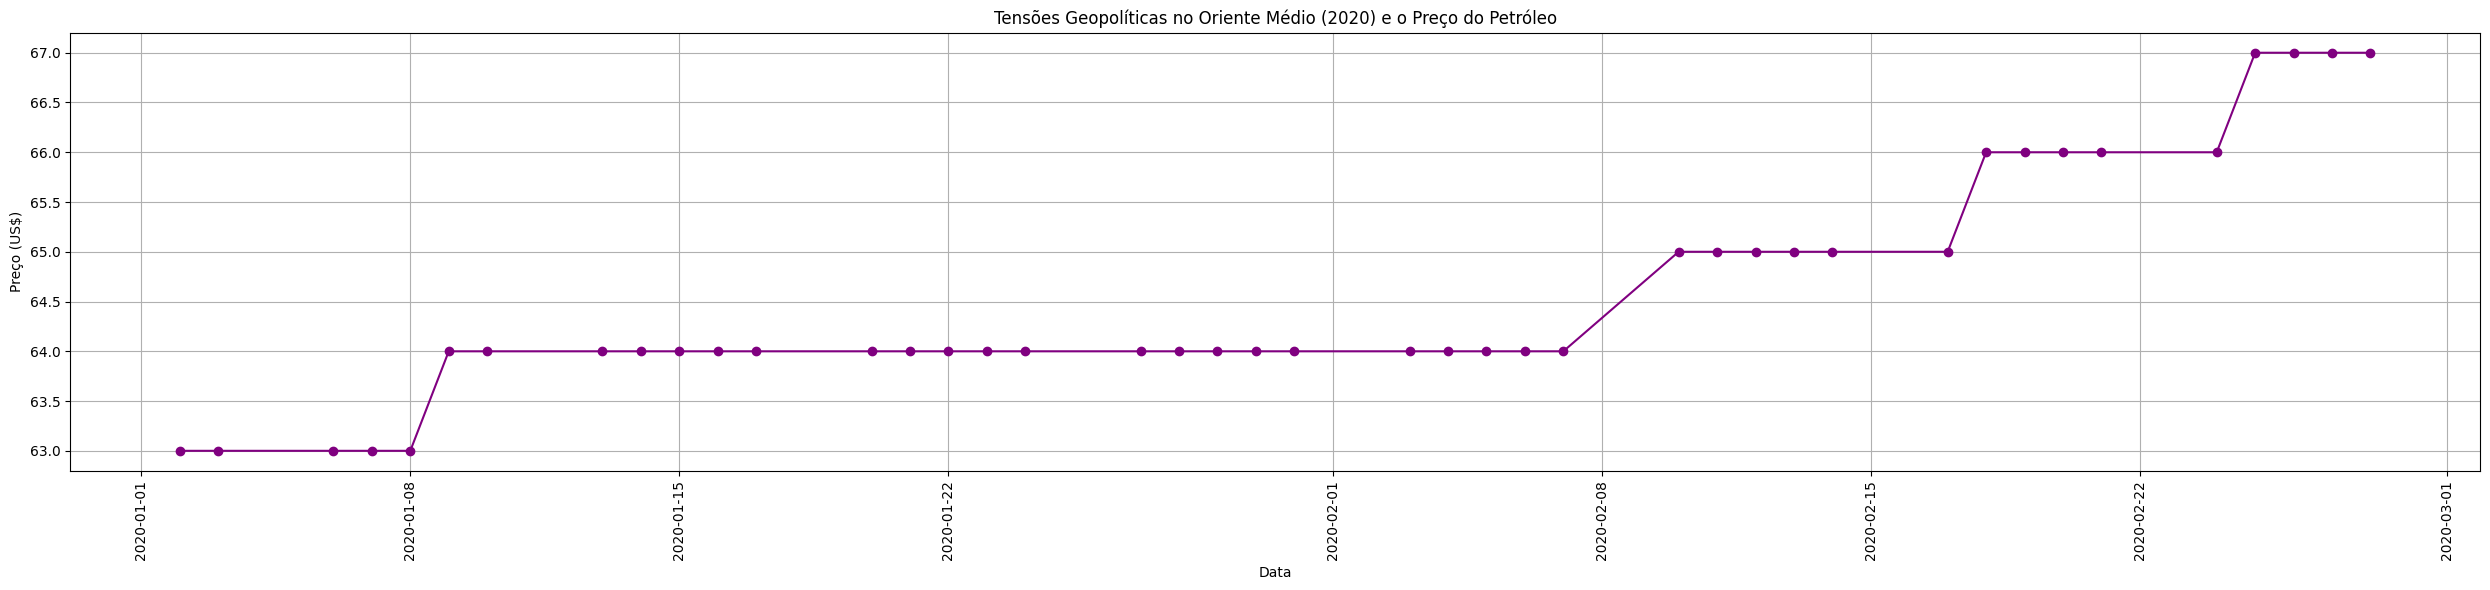

In [ ]:
df_geopolitica = df[(df['data'] >= '2020-01-01') & (df['data'] <= '2020-03-01')]
plt.figure(figsize=(25, 6))
plt.plot(df_geopolitica['data'], df_geopolitica['preco'], marker='o', color='purple', linestyle='-')
plt.title('Tensões Geopolíticas no Oriente Médio (2020) e o Preço do Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Crise Econômica de 2008

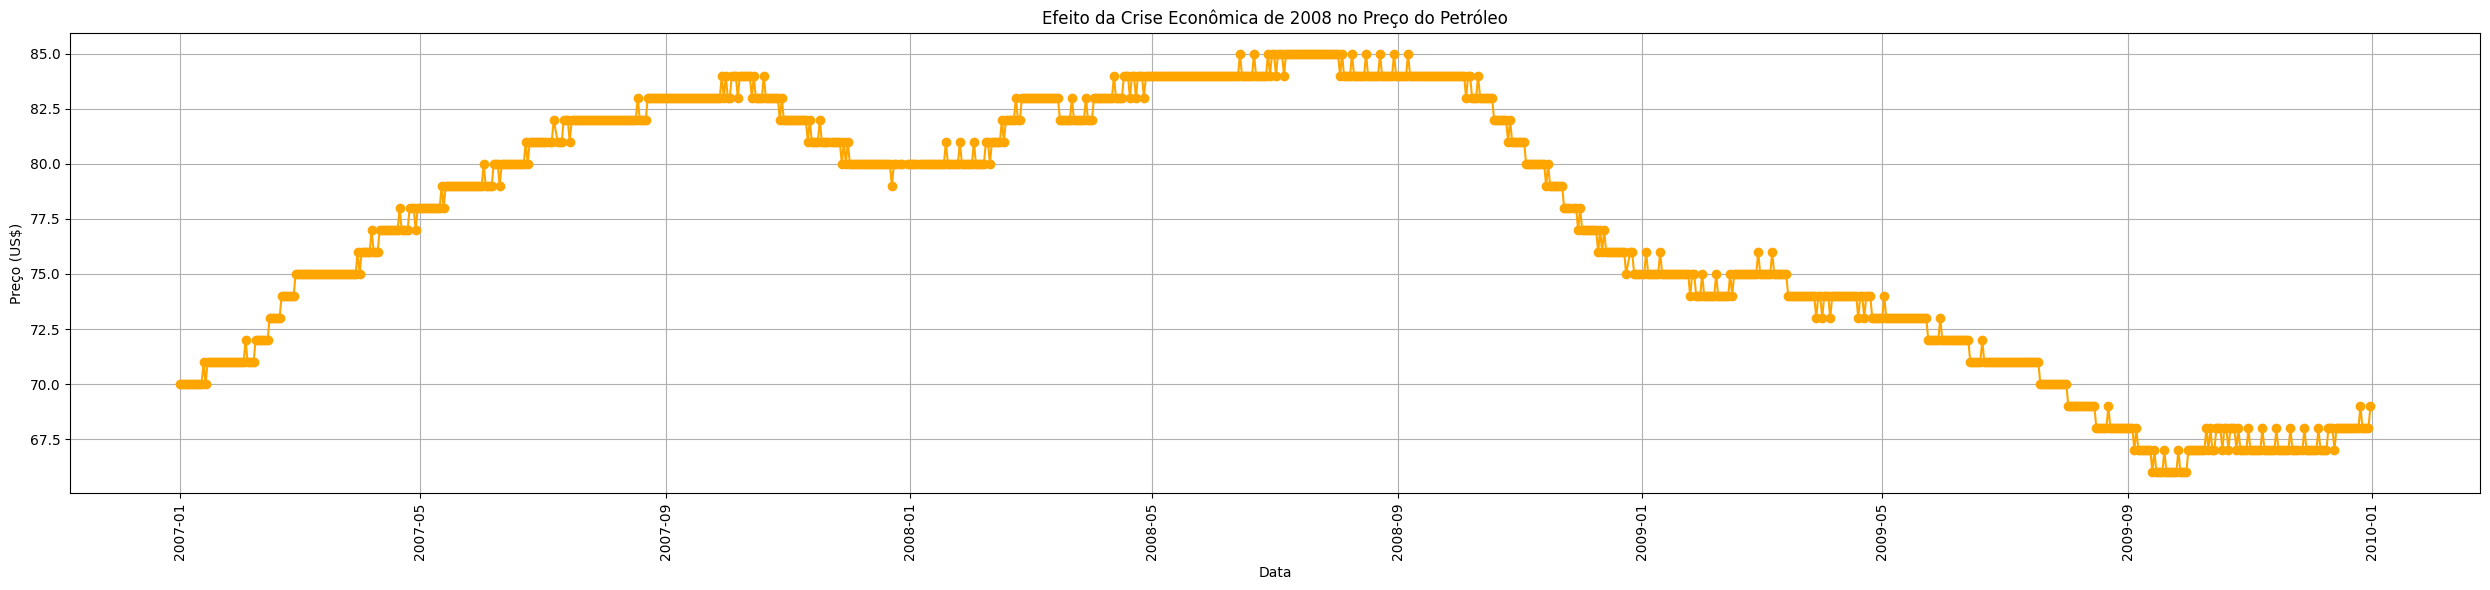

In [ ]:
df_2008 = df[(df['data'] >= '2007-01-01') & (df['data'] <= '2009-12-31')]
plt.figure(figsize=(25, 6))
plt.plot(df_2008['data'], df_2008['preco'], marker='o', color='orange', linestyle='-')
plt.title('Efeito da Crise Econômica de 2008 no Preço do Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Acordo da OPEP e Cortes na Produção (2016) - (Organização dos Países Exportadores de Petróleo)

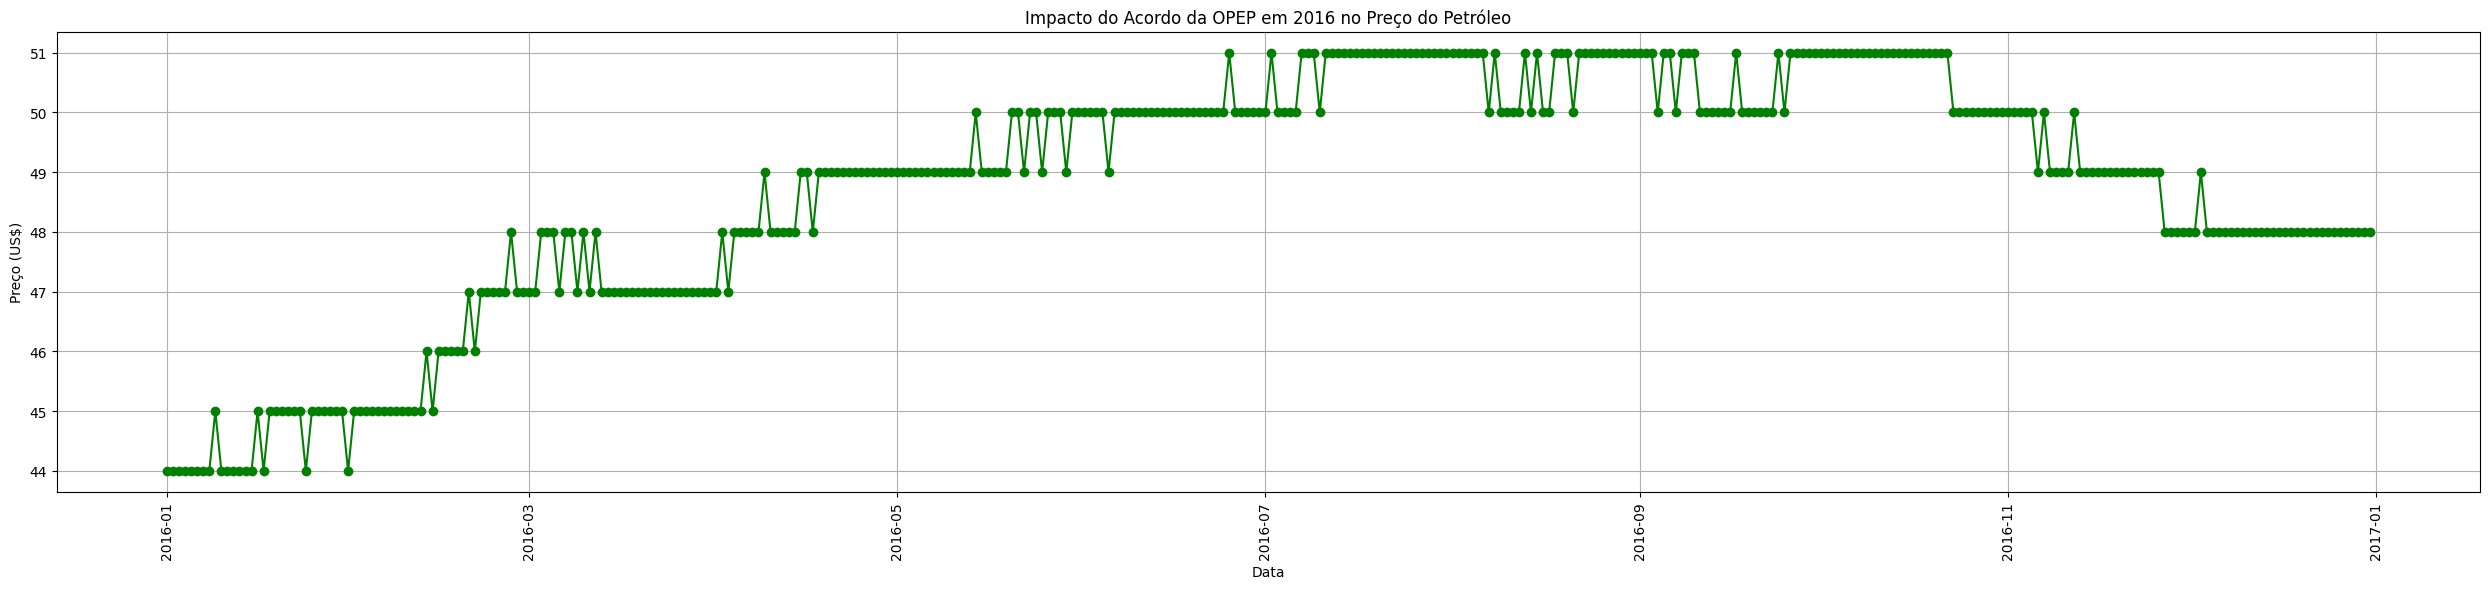

In [ ]:
df_2016 = df[(df['data'] >= '2016-01-01') & (df['data'] <= '2016-12-31')]
plt.figure(figsize=(25, 6))
plt.plot(df_2016['data'], df_2016['preco'], marker='o', color='green', linestyle='-')
plt.title('Impacto do Acordo da OPEP em 2016 no Preço do Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Preparando Dados para o prophet

In [ ]:
# Preparar os dados para o Prophet
df = df.reset_index().rename(columns={'Data': 'ds', 'Preco - petroleo bruto - Brent (FOB)': 'y'})

print(f"O dataframe tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O dataframe tem 11262 linhas e 6 colunas


In [ ]:
## Visualizando as linhas recentes, para entender a data final da base:
df.head()

,index,Unnamed: 0,data,Fechamento realizado,preco_previsto,preco
0,0,0,2024-09-23,74.95,90.658473,91.0
1,1,1,2024-09-20,75.96,90.578831,91.0
2,2,2,2024-09-19,75.93,90.565526,91.0
3,3,3,2024-09-18,74.52,90.463839,90.0
4,4,4,2024-09-17,74.55,90.515278,91.0


In [ ]:
## Visualizando as linhas mais antigas, para entender a data inicial da base:
df.tail()

,index,Unnamed: 0,data,Fechamento realizado,preco_previsto,preco
11257,11257,11257,1987-05-26,18.63,17.979236,18.0
11258,11258,11258,1987-05-25,18.60,18.052164,18.0
11259,11259,11259,1987-05-22,18.55,18.021246,18.0
11260,11260,11260,1987-05-21,18.45,18.007780,18.0
11261,11261,11261,1987-05-20,18.63,17.897394,18.0


In [ ]:
## Não há valores nulos na base, portanto vamos para o próximo passo, selecionar apenas as colunas que iremos usar:
df=df[['data', 'preco']]

In [ ]:
df

,data,preco
0,2024-09-23,91.0
1,2024-09-20,91.0
2,2024-09-19,91.0
3,2024-09-18,90.0
4,2024-09-17,91.0
...,...,...
11257,1987-05-26,18.0
11258,1987-05-25,18.0
11259,1987-05-22,18.0
11260,1987-05-21,18.0


##Estrutura do Dado:
As datas precisam estar em formato reconhecível (dia/mês/ano) e valores precisam representar preço de fechamento da bolsa. Caso exista formatos inconsistentes isso pode ser um impeditivo para as análises

In [ ]:
# Convertendo a coluna para Data
df['data'] = pd.to_datetime(df['data'], format="%Y-%m-%d") # Changed the format to "%Y-%m-%d" to match the actual date format in the column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    11262 non-null  datetime64[ns]
 1   preco   11262 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 176.1 KB


In [ ]:
# Transformando a coluna Ano para Index
df.set_index('data', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11262 entries, 2024-09-23 to 1987-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preco   11262 non-null  float64
dtypes: float64(1)
memory usage: 176.0 KB


In [ ]:
df['preco'] = df['preco'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11262 entries, 2024-09-23 to 1987-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preco   11262 non-null  float64
dtypes: float64(1)
memory usage: 176.0 KB


### Iniciar preparação para previsão dos dados:

In [ ]:
# Preparar os dados para o Prophet
df_prophet = df.reset_index().rename(columns={'data': 'ds', 'preco': 'y'})

In [ ]:
print(df.columns)

Index(['preco'], dtype='object')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcjis373j/4b2_396l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcjis373j/bq1a1rvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92600', 'data', 'file=/tmp/tmpcjis373j/4b2_396l.json', 'init=/tmp/tmpcjis373j/bq1a1rvn.json', 'output', 'file=/tmp/tmpcjis373j/prophet_modelyu_o88b7/prophet_model-20241118232700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:27:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


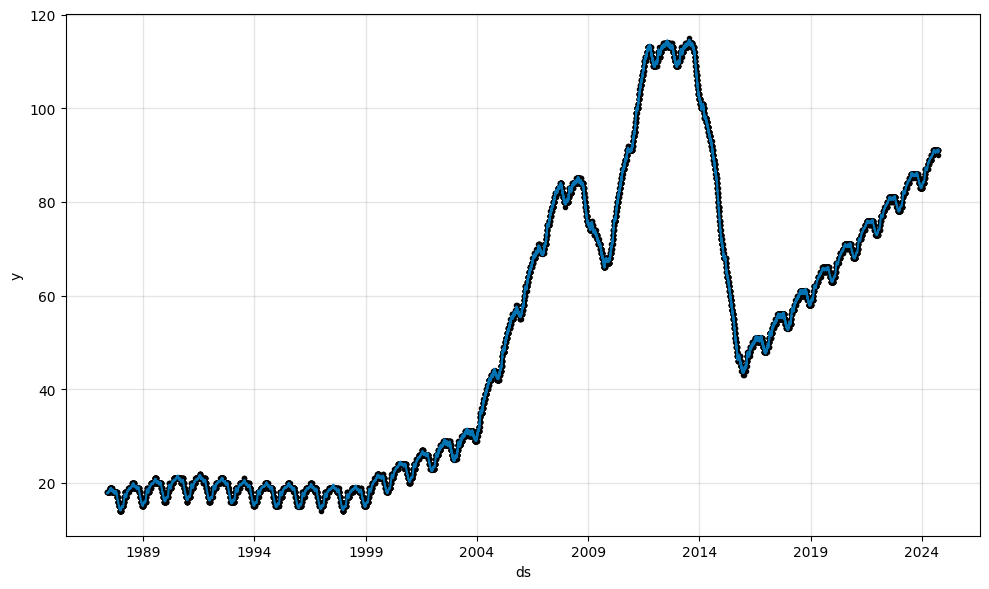

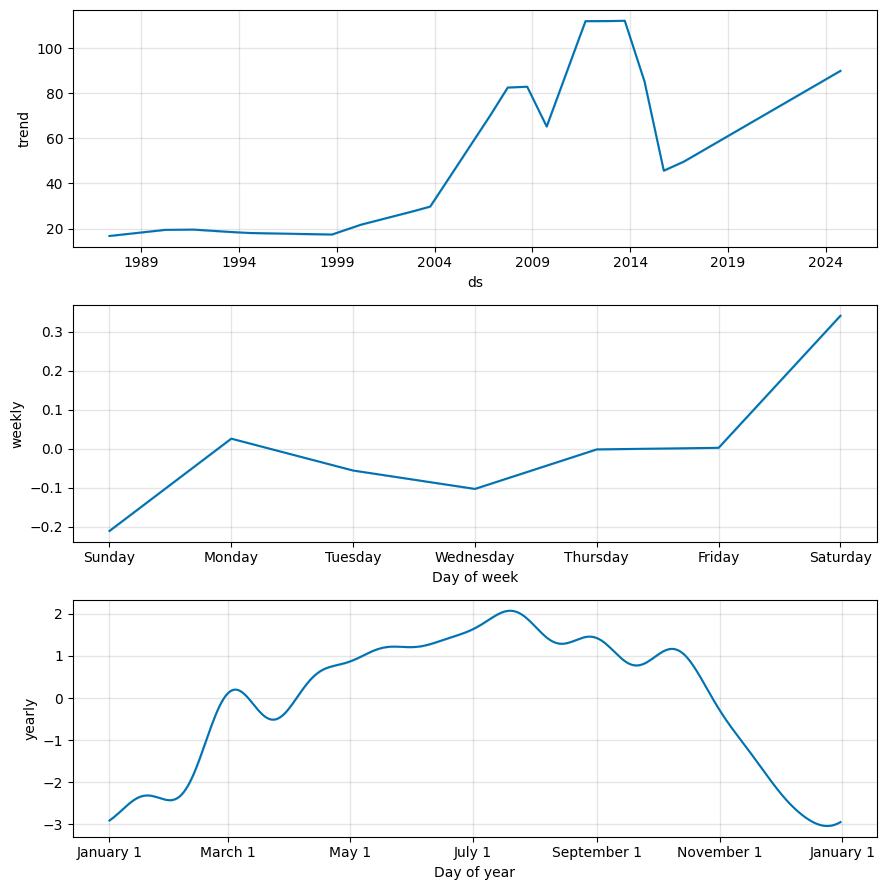

In [ ]:
# Ajustar o modelo Prophet
model = Prophet()
model.fit(df_prophet)

# Criar DataFrame para datas futuras e fazer previsões
future = model.make_future_dataframe(periods=6, freq='d')
forecast = model.predict(future)

# Visualizar as previsões
fig1 = model.plot(forecast)
plt.show()

# Visualizar os componentes das previsões
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,16.688685,17.428367,18.154799,16.688685,16.688685,1.110022,1.110022,1.110022,-0.102692,-0.102692,-0.102692,1.212713,1.212713,1.212713,0.0,0.0,0.0,17.798707
1,1987-05-21,16.691332,17.528288,18.245807,16.691332,16.691332,1.215767,1.215767,1.215767,-0.001356,-0.001356,-0.001356,1.217122,1.217122,1.217122,0.0,0.0,0.0,17.907099
2,1987-05-22,16.693980,17.526773,18.278292,16.693980,16.693980,1.222385,1.222385,1.222385,0.002653,0.002653,0.002653,1.219732,1.219732,1.219732,0.0,0.0,0.0,17.916365
3,1987-05-25,16.701921,17.564145,18.302014,16.701921,16.701921,1.245408,1.245408,1.245408,0.026191,0.026191,0.026191,1.219216,1.219216,1.219216,0.0,0.0,0.0,17.947329
4,1987-05-26,16.704569,17.478771,18.238110,16.704569,16.704569,1.161723,1.161723,1.161723,-0.055516,-0.055516,-0.055516,1.217239,1.217239,1.217239,0.0,0.0,0.0,17.866291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11263,2024-09-25,89.913379,90.289745,91.004558,89.913379,89.913379,0.737563,0.737563,0.737563,-0.102692,-0.102692,-0.102692,0.840255,0.840255,0.840255,0.0,0.0,0.0,90.650943
11264,2024-09-26,89.927155,90.430067,91.160855,89.927155,89.927155,0.866523,0.866523,0.866523,-0.001356,-0.001356,-0.001356,0.867879,0.867879,0.867879,0.0,0.0,0.0,90.793679
11265,2024-09-27,89.940932,90.474652,91.205832,89.940932,89.940932,0.901257,0.901257,0.901257,0.002653,0.002653,0.002653,0.898603,0.898603,0.898603,0.0,0.0,0.0,90.842188
11266,2024-09-28,89.954708,90.863901,91.574435,89.954708,89.954708,1.272739,1.272739,1.272739,0.341218,0.341218,0.341218,0.931521,0.931521,0.931521,0.0,0.0,0.0,91.227447


In [ ]:
df.reset_index(inplace=True)
df

,data,preco
0,2024-09-23,91.0
1,2024-09-20,91.0
2,2024-09-19,91.0
3,2024-09-18,90.0
4,2024-09-17,91.0
...,...,...
11257,1987-05-26,18.0
11258,1987-05-25,18.0
11259,1987-05-22,18.0
11260,1987-05-21,18.0


In [ ]:
##Separando as colunas que vamos utilizar das previsoes
df_forecast=forecast[['ds','yhat']]
#Renomenando as colunas
df_forecast=df_forecast.rename(columns={'ds':'data','yhat':'preco'})
##Juntando com a base inicial
df=df.merge(df_forecast, on='data', how='left')
df = df.rename(columns={'preco_x': 'preço_realizado', 'preco_y': 'preço_previsto'})
df

,data,preço_realizado,preço_previsto
0,2024-09-23,91.0,90.709534
1,2024-09-20,91.0,90.620923
2,2024-09-19,91.0,90.607477
3,2024-09-18,90.0,90.503025
4,2024-09-17,91.0,90.553291
...,...,...,...
11257,1987-05-26,18.0,17.866291
11258,1987-05-25,18.0,17.947329
11259,1987-05-22,18.0,17.916365
11260,1987-05-21,18.0,17.907099


In [ ]:
# Cálculo do sMAPE para cada linha
df['sMAPE'] = 100 * (abs(df['preço_realizado'] - df['preço_previsto']) /
                     ((abs(df['preço_realizado']) + abs(df['preço_previsto'])) / 2))

# Cálculo do MAE para cada linha
df['MAE'] = abs(df['preço_realizado'] - df['preço_previsto'])

# Média do sMAPE
smape_medio = df['sMAPE'].mean()
print(f"sMAPE médio: {smape_medio:.2f}%")

# Média do MAE
mae_medio = df['MAE'].mean()
print(f"MAE médio: {mae_medio:.2f}")

sMAPE médio: 0.71%
MAE médio: 0.25


De acordo com o SMAP, temos uma taxa de erro aproximada de 13% ou seja possuímos aproximadamente 87% de acurácia do modelo.


# Leitura e Tratamento de Dados

**1. Leitura dos Dados:**

Os dados de preços do petróleo foram importados a partir de um arquivo CSV obtido do site Ipeadata. O arquivo foi carregado utilizando o método pd.read_csv(), especificando o delimitador como tabulação (\t) para garantir que os dados fossem lidos corretamente.

**Tratamento de Dados:**

**Renomeação de Colunas:**

As colunas foram renomeadas para facilitar a manipulação, com especial atenção para a coluna de preços, que foi renomeada para 'preco'.

**Conversão de Tipos:**

Foi feita a conversão da coluna de preços de string para float, substituindo vírgulas por pontos para garantir que os valores estivessem no formato numérico adequado.

**Remoção de Espaços em Branco:**

Utilizando df.columns.str.strip(), foram removidos espaços em branco indesejados nas colunas, evitando problemas futuros na manipulação dos dados.

**Tratamento de Duplicatas e Valores Nulos:**

 O código também incluiu a remoção de linhas duplicadas e a exclusão de linhas com valores nulos, assegurando que a análise fosse realizada em um conjunto de dados limpo e consistente.

**2. Visualização do Preço do Petróleo**

**Gráficos de Linha:**

**Impacto da Pandemia (2020):**

Um gráfico foi criado para visualizar a variação do preço do petróleo durante o ano de 2020, destacando o impacto da pandemia de COVID-19. Esse gráfico permite observar flutuações significativas nos preços ao longo do ano.

**Tensões Geopolíticas no Oriente Médio (2020):**

Um segundo gráfico focou no período de tensões geopolíticas no Oriente Médio, de janeiro a março de 2020, proporcionando uma visão clara de como esses eventos afetaram os preços do petróleo nesse intervalo.

**Crise Econômica de 2008:**

Um terceiro gráfico foi utilizado para ilustrar o efeito da crise econômica de 2008 sobre os preços do petróleo. A visualização abrangeu um período maior, de 2007 a 2009, permitindo identificar tendências e padrões resultantes dessa crise global.

**3. Observações:**

**Variações Históricas:**

A análise dos gráficos permitiu identificar períodos de alta e baixa nos preços do petróleo, correlacionando essas variações a eventos geopolíticos ou crises econômicas.

**Sazonalidade:**

As visualizações podem indicar sazonalidades nos preços, que são influenciadas por fatores como demanda global e mudanças climáticas.
Impactos de Eventos: Observações podem ser geradas a partir da análise de eventos significativos, como guerras, crises financeiras ou mudanças nas políticas energéticas que afetaram a oferta e a demanda de petróleo.

**4. Modelo de Machine Learning**

**Previsão de Preços:**

Um modelo de Machine Learning, como PROPHET, foi sugerido para prever os preços futuros do petróleo. O uso de modelos de séries temporais é essencial para capturar padrões e sazonalidades nos dados de preços.

**Análise de Performance:**

A eficácia do modelo será analisada utilizando métricas como RMSE (Root Mean Squared Error),permitindo uma avaliação precisa da precisão das previsões e auxiliando na tomada de decisões por empresas do setor.
Essa abordagem detalhada fornece uma visão clara das etapas realizadas, desde a leitura e tratamento dos dados até a visualização e extração dos dados, culminando na proposição de um modelo preditivo.